 Background removing



### **Let's start!**

## 1. Preparation

<p align="justify">In the top menu of this session, select <b>Runtime -> Change runtime type</b>, and set <b>Hardware Accelerator</b> to <b>GPU</b>.</p>

<p align="justify">Clone the repository, and download the pre-trained model:</p>


In [1]:
import os

# clone the repository
%cd /content
if not os.path.exists('MODNet'):
  !git clone https://github.com/ZHKKKe/MODNet
%cd MODNet/

# dowload the pre-trained ckpt for image matting
pretrained_ckpt = 'pretrained/modnet_photographic_portrait_matting.ckpt'
if not os.path.exists(pretrained_ckpt):
  !gdown --id 1mcr7ALciuAsHCpLnrtG_eop5-EYhbCmz \
          -O pretrained/modnet_photographic_portrait_matting.ckpt

/content
Cloning into 'MODNet'...
remote: Enumerating objects: 264, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 264 (delta 27), reused 29 (delta 11), pack-reused 206
Receiving objects: 100% (264/264), 60.77 MiB | 26.28 MiB/s, done.
Resolving deltas: 100% (89/89), done.
/content/MODNet
Downloading...
From: https://drive.google.com/uc?id=1mcr7ALciuAsHCpLnrtG_eop5-EYhbCmz
To: /content/MODNet/pretrained/modnet_photographic_portrait_matting.ckpt
100% 26.3M/26.3M [00:00<00:00, 60.0MB/s]


## 2. Upload Images

<p align="justify">Upload portrait images to be processed (only PNG and JPG format are supported):</p>

In [2]:
import shutil
import os
from google.colab import files

# clean and rebuild the image folders
input_folder = 'demo/image_matting/colab/input'
if os.path.exists(input_folder):
  shutil.rmtree(input_folder)
os.makedirs(input_folder)

output_folder = 'demo/image_matting/colab/output'
if os.path.exists(output_folder):
  shutil.rmtree(output_folder)
os.makedirs(output_folder)

# upload images (PNG or JPG)
image_names = list(files.upload().keys())
for image_name in image_names:
  shutil.move(image_name, os.path.join(input_folder, image_name))


Saving couple.jpg to couple.jpg


## 3. Inference

<p align="justify">Run the following command for alpha matte prediction:</p>

In [3]:

!python -m demo.image_matting.colab.inference \
        --input-path demo/image_matting/colab/input \
        --output-path demo/image_matting/colab/output \
        --ckpt-path ./pretrained/modnet_photographic_portrait_matting.ckpt


Process image: couple.jpg
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


## 4. Visualization

<p align="justify">Display the results (from left to right: image, foreground, and alpha matte):</p>

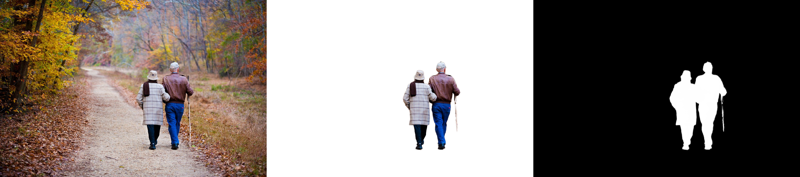

couple.jpg 



In [4]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import cv2

def combined_display(image, matte):
  # calculate display resolution
  w, h = image.width, image.height
  rw, rh = 800, int(h * 800 / (3 * w))
  
  # obtain predicted foreground
  image = np.asarray(image)
  if len(image.shape) == 2:
    image = image[:, :, None]
  if image.shape[2] == 1:
    image = np.repeat(image, 3, axis=2)
  elif image.shape[2] == 4:
    image = image[:, :, 0:3]
  matte = np.repeat(np.asarray(matte)[:, :, None], 3, axis=2) / 255
  foreground = image * matte + np.full(image.shape, 255) * (1 - matte)
  
  # combine image, foreground, and alpha into one line
  combined = np.concatenate((image, foreground, matte * 255), axis=1)
  combined = Image.fromarray(np.uint8(combined)).resize((rw, rh))
  return combined

# visualize all images
image_names = os.listdir(input_folder)
for image_name in image_names:
  matte_name = image_name.split('.')[0] + '.png'
  image = Image.open(os.path.join(input_folder, image_name))
  matte = Image.open(os.path.join(output_folder, matte_name))
  display(combined_display(image, matte))
  print(image_name, '\n')


In [5]:
input_folder

'demo/image_matting/colab/input'

## Download Results

<p align="justify">Download the Zip package of predicted alpha mattes:</p>

In [6]:
zip_filename = 'matte.zip'
if os.path.exists(zip_filename):
  os.remove(zip_filename)

os.system(f"zip -r -j {zip_filename} {output_folder}/*")
files.download(zip_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
# zip 으로 압축
!zip -r /content/MODNet.zip /content/MODNet

  adding: content/MODNet/ (stored 0%)
  adding: content/MODNet/LICENSE (deflated 65%)
  adding: content/MODNet/pretrained/ (stored 0%)
  adding: content/MODNet/pretrained/modnet_photographic_portrait_matting.ckpt (deflated 8%)
  adding: content/MODNet/pretrained/README.md (deflated 20%)
  adding: content/MODNet/src/ (stored 0%)
  adding: content/MODNet/src/__pycache__/ (stored 0%)
  adding: content/MODNet/src/__pycache__/__init__.cpython-37.pyc (deflated 25%)
  adding: content/MODNet/src/trainer.py (deflated 75%)
  adding: content/MODNet/src/models/ (stored 0%)
  adding: content/MODNet/src/models/__pycache__/ (stored 0%)
  adding: content/MODNet/src/models/__pycache__/__init__.cpython-37.pyc (deflated 25%)
  adding: content/MODNet/src/models/__pycache__/modnet.cpython-37.pyc (deflated 55%)
  adding: content/MODNet/src/models/backbones/ (stored 0%)
  adding: content/MODNet/src/models/backbones/__pycache__/ (stored 0%)
  adding: content/MODNet/src/models/backbones/__pycache__/__init__.cp

In [8]:
# zip 파일 로컬에 저장
from google.colab import files
files.download("/content/MODNet.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>